In [102]:
import necstdb #謎の自作モジュール
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = "Arial,freesans"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = 20

In [22]:
path = "/home/amigos/hdd/data/hot_monitor_1h20191120_125814.necstdb/"
path = "/home/amigos/hdd/data/hot_monitor_1h20191129_204534.necstdb/"
path = "/home/amigos/hdd/data/hot_monitor_1h20191203_102233.necstdb/"
path = "/home/amigos/hdd2/data/hot_monitor_1h20191206_075751.necstdb/"

In [73]:
!ls /home/amigos/hdd2/data/hot_monitor_1h20191206_075751.necstdb/

alert.data			      sg_200ghz_1st_freq_web.data
alert.header			      sg_200ghz_1st_freq_web.header
antenna_dio.data		      sg_200ghz_1st_onoff_web.data
antenna_dio.header		      sg_200ghz_1st_onoff_web.header
authority_check.data		      sg_200ghz_1st_power_web.data
authority_check.header		      sg_200ghz_1st_power_web.header
check_alert.data		      sg_200ghz_2nd_lower_freq_web.data
check_alert.header		      sg_200ghz_2nd_lower_freq_web.header
check_launch.data		      sg_200ghz_2nd_lower_onoff_web.data
check_launch.header		      sg_200ghz_2nd_lower_onoff_web.header
check_node.data			      sg_200ghz_2nd_lower_power_web.data
check_node.header		      sg_200ghz_2nd_lower_power_web.header
cpz7415v_1_rsw0_u_step_cmd.data       sg_200ghz_2nd_upper_freq_web.data
cpz7415v_1_rsw0_u_step_cmd.header     sg_200ghz_2nd_upper_freq_web.header
davis_weather.data		      sg_200ghz_2nd_upper_onoff_web.data
davis_weather.header		      sg_200ghz_2nd_upper_onoff_web.header
dome_dio.data			      sg_200ghz_2nd_u

In [23]:
n = necstdb.opendb(path) #謎の呪文

In [128]:
# 謎
#いずれはfor文使って書きたい
n_board1 = n.open_table("xffts_power_board01")
n_board2 = n.open_table("xffts_power_board02")
n_board3 = n.open_table("xffts_power_board03")
n_board4 = n.open_table("xffts_power_board04")
n_board7 = n.open_table("xffts_power_board07")
n_board8 = n.open_table("xffts_power_board08")
n_board11 = n.open_table("xffts_power_board11")
n_board12 = n.open_table("xffts_power_board12")
n_board15 = n.open_table("xffts_power_board15")
n_board16 = n.open_table("xffts_power_board16")
hemt4l = n.open_table("hemt_4r_id")
hemt4rvg1 = n.open_table("hemt_4r_vg1")
hemt4rvg2 = n.open_table("hemt_4r_vg2")
sisvol = n.open_table("sis_vol_4r")
siscur = n.open_table("sis_cur_4r")
ls6 = n.open_table("lakeshore_ch6")

In [129]:
#生データ
data1 = n_board1.read()
data2 = n_board2.read()
data7 = n_board7.read()
data8 = n_board8.read()
data11 = n_board11.read()
data12 = n_board12.read()
data_hemt4l = hemt4l.read()
data_hemt4rvg1 = hemt4rvg1.read()
data_hemt4rvg2 = hemt4rvg2.read()
data_sisvol = sisvol.read()
data_siscur = siscur.read()
dls6 = ls6.read()

In [130]:
#numpy array化
data1 = numpy.array(data1) 
data2 = numpy.array(data2)
data7 = numpy.array(data7)
data8 = numpy.array(data8)
data11 = numpy.array(data11)
data12 = numpy.array(data12)
data_hemt4l = numpy.array(data_hemt4l)
data_hemt4rvg1 = numpy.array(data_hemt4rvg1)
data_hemt4rvg2 = numpy.array(data_hemt4rvg2)
data_sisvol = numpy.array(data_sisvol)
data_siscur = numpy.array(data_siscur)
dls6 = numpy.array(dls6)

In [131]:
#T[0]、T[1]に時間のデータが入ってる
timestamp1 = data1.T[0]
timestamp2 = data2.T[0]
timestamp7 = data7.T[0]
timestamp8 = data8.T[0]
timestamp11 = data11.T[0]
timestamp12 = data12.T[0]
t_hemt4l = data_hemt4l.T[0]
t_hemt4rvg1 = data_hemt4rvg1.T[0]
t_hemt4rvg2 = data_hemt4rvg2.T[0]
t_sisvol = data_sisvol.T[0]
t_siscur = data_siscur.T[0]
tls6 = dls6.T[0]

In [132]:
tpower1 =data1.T[2]
tpower2 = data2.T[2]
tpower7 = data7.T[2]
tpower8 = data8.T[2]
tpower11 = data11.T[2]
tpower12 = data12.T[2]
d_hemt4l = data_hemt4l.T[1]
d_hemt4rvg1 = data_hemt4rvg1.T[1]
d_hemt4rvg2 = data_hemt4rvg2.T[1]
d_sisvol = data_sisvol.T[1]
d_siscur = data_siscur.T[1]
ttls6 = dls6.T[1]

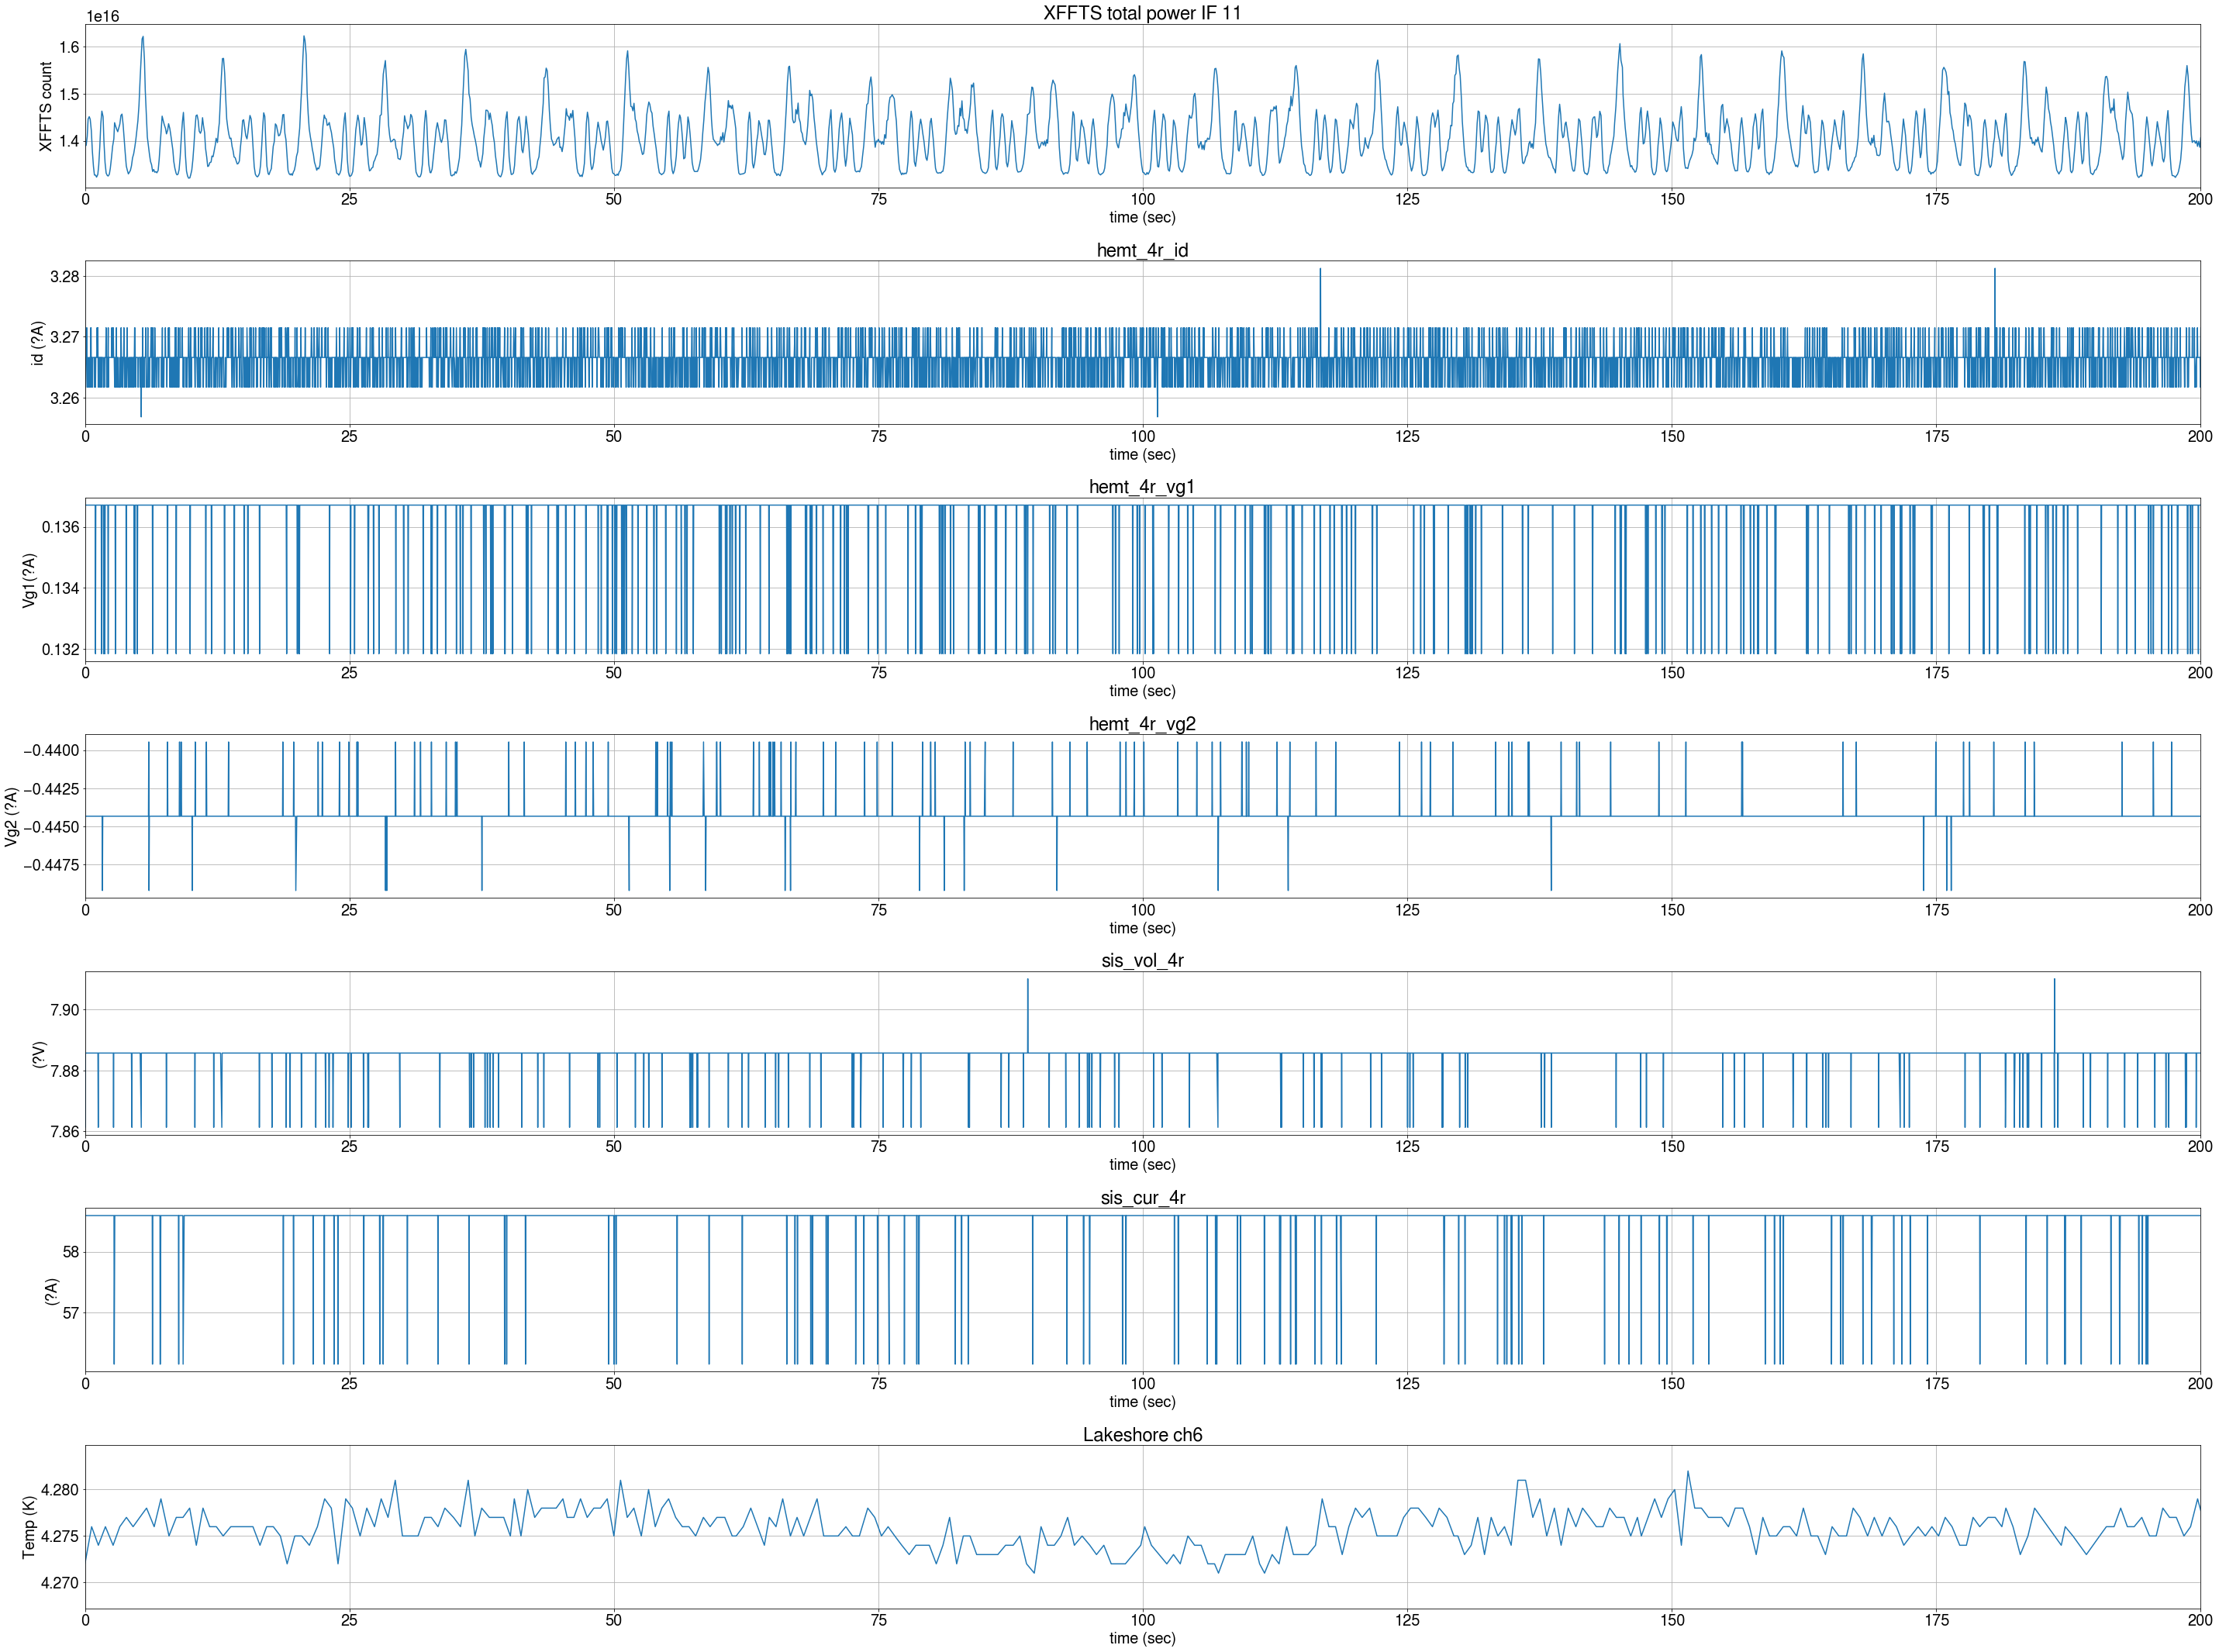

In [134]:
mx = 200

fig = plt.figure(figsize=(40, 30))
ax = plt.subplot(7,1,1)
ax.plot(timestamp11 - timestamp11[0], tpower11)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("XFFTS total power IF 11")
ax.set_xlabel("time (sec)")
ax.set_ylabel("XFFTS count")

ax = plt.subplot(7,1,2)
ax.plot(t_hemt4l - t_hemt4l[0], d_hemt4l)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("hemt_4r_id")
ax.set_xlabel("time (sec)")
ax.set_ylabel("id (?A)")

ax = plt.subplot(7,1,3)
ax.plot(t_hemt4rvg1 - t_hemt4rvg1[0], d_hemt4rvg1)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("hemt_4r_vg1")
ax.set_xlabel("time (sec)")
ax.set_ylabel("Vg1(?A)")

ax = plt.subplot(7,1,4)
ax.plot(t_hemt4rvg2 - t_hemt4rvg2[0], d_hemt4rvg2)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("hemt_4r_vg2")
ax.set_xlabel("time (sec)")
ax.set_ylabel("Vg2 (?A)")

ax = plt.subplot(7,1,5)
ax.plot(t_sisvol - t_sisvol[0], d_sisvol)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("sis_vol_4r")
ax.set_xlabel("time (sec)")
ax.set_ylabel("(?V)")

ax = plt.subplot(7,1,6)
ax.plot(t_siscur - t_siscur[0], d_siscur)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("sis_cur_4r")
ax.set_xlabel("time (sec)")
ax.set_ylabel("(?A)")

ax = plt.subplot(7,1,7)
ax.plot(tls6 - tls6[0], ttls6)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("Lakeshore ch6")
ax.set_xlabel("time (sec)")
ax.set_ylabel("Temp (K)")
plt.tight_layout()

In [135]:
#だいたい以上！

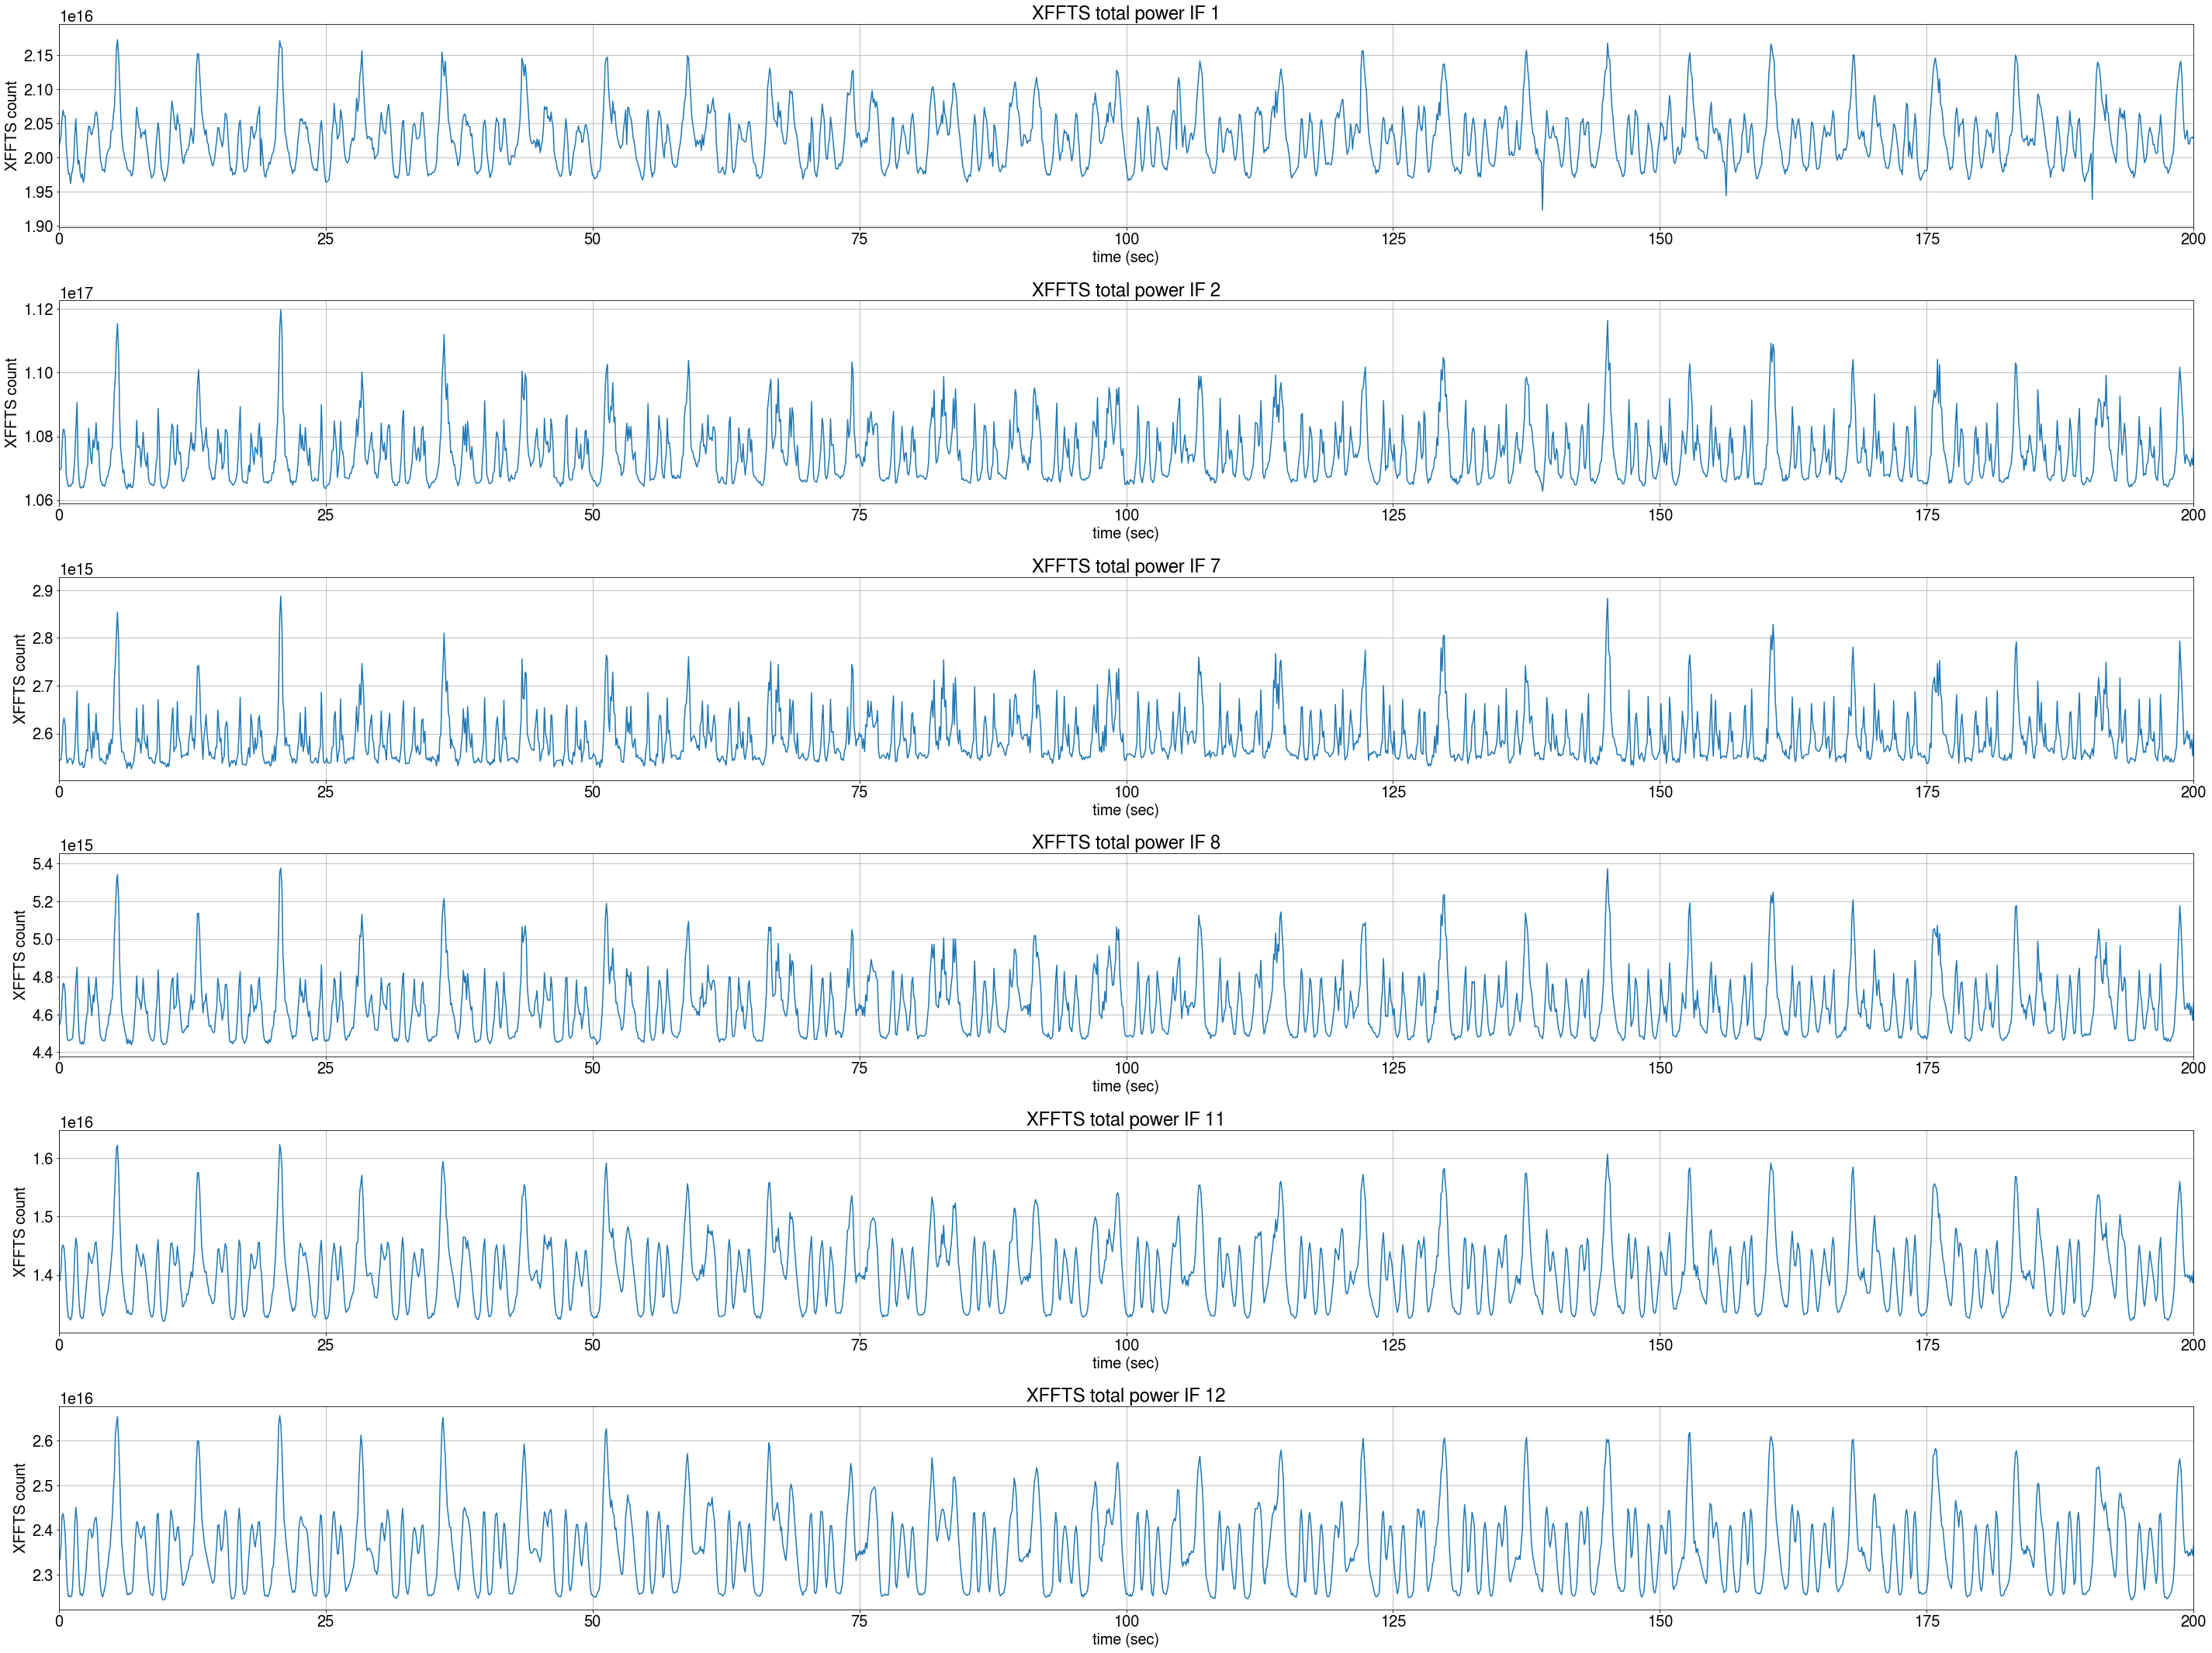

In [140]:
fig = plt.figure(figsize=(40, 30))
ax = plt.subplot(6,1,1)
ax.plot(timestamp1 - timestamp1[0], tpower1)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("XFFTS total power IF 1")
ax.set_xlabel("time (sec)")
ax.set_ylabel("XFFTS count")

ax = plt.subplot(6,1,2)
ax.plot(timestamp2 - timestamp2[0], tpower2)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("XFFTS total power IF 2")
ax.set_xlabel("time (sec)")
ax.set_ylabel("XFFTS count")

"""ax = plt.subplot(10,1,3)
ax.plot(timestamp3 - timestamp3[0], tpower3)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("XFFTS total power IF 3")
ax.set_xlabel("time (sec)")
ax.set_ylabel("XFFTS count")

ax = plt.subplot(10,1,4)
ax.plot(timestamp4 - timestamp4[0], tpower4)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("XFFTS total power IF 4")
ax.set_xlabel("time (sec)")
ax.set_ylabel("XFFTS count")"""

ax = plt.subplot(6,1,3)
ax.plot(timestamp7 - timestamp7[0], tpower7)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("XFFTS total power IF 7")
ax.set_xlabel("time (sec)")
ax.set_ylabel("XFFTS count")

ax = plt.subplot(6,1,4)
ax.plot(timestamp8 - timestamp8[0], tpower8)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("XFFTS total power IF 8")
ax.set_xlabel("time (sec)")
ax.set_ylabel("XFFTS count")

ax = plt.subplot(6,1,5)
ax.plot(timestamp11 - timestamp11[0], tpower11)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("XFFTS total power IF 11")
ax.set_xlabel("time (sec)")
ax.set_ylabel("XFFTS count")

ax = plt.subplot(6,1,6)
ax.plot(timestamp12 - timestamp12[0], tpower12)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("XFFTS total power IF 12")
ax.set_xlabel("time (sec)")
ax.set_ylabel("XFFTS count")

"""ax = plt.subplot(10,1,9)
ax.plot(timestamp15 - timestamp15[0], tpower15)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("XFFTS total power IF 15")
ax.set_xlabel("time (sec)")
ax.set_ylabel("XFFTS count")

ax = plt.subplot(10,1,10)
ax.plot(timestamp16 - timestamp16[0], tpower16)
ax.set_xlim(0, mx)
ax.grid(True)
ax.set_title("XFFTS total power IF 16")
ax.set_xlabel("time (sec)")
ax.set_ylabel("XFFTS count")"""

plt.tight_layout()

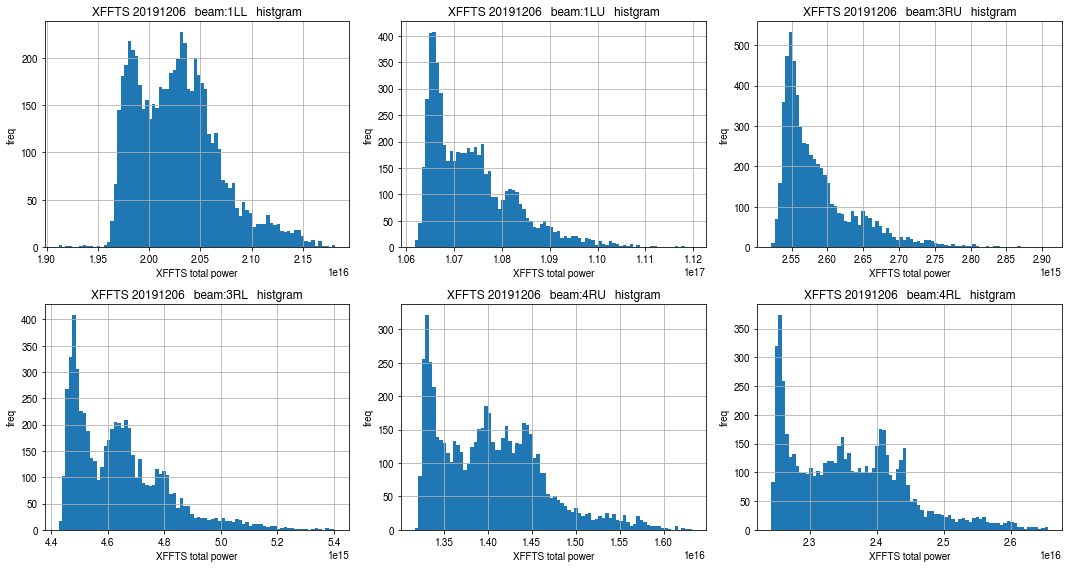

In [9]:
time = "20191206" #<==編集

ncol = 3
nrow = 2
nax = ncol * nrow

figsize = (ncol * 5, nrow * 4)
fig = plt.figure(figsize=figsize)

def plot_hist(tpower_number,number,IF_num):
    ax = fig.add_subplot(2,3,number)
    ax.hist(tpower_number, bins=80)
    ax.set_xlabel("XFFTS total power")
    ax.set_ylabel("freq")
    ax.set_title("XFFTS {}   beam:{}   histgram".format(time,IF_num))
    ax.grid()
    plt.tight_layout()#文字が重ならなくなる
    
plot_hist(tpower1, 1, '1LL')
plot_hist(tpower2, 2, '1LU')
plot_hist(tpower7, 3, '3RU')
plot_hist(tpower8, 4, '3RL')
plot_hist(tpower11, 5, '4RU')
plot_hist(tpower12, 6, '4RL')

plt.savefig("hot_monitor_hist_{}.png".format(time))

In [10]:
tpower_list = [tpower1,tpower2,tpower7,tpower8,tpower11,tpower12]
number_list = [1,2,3,4,5,6]
beam_list = ['1LL','1LU','2RU','2RL','3RU','3RL','4RU','4RL','5RU','5RL']
timestamp_list = [timestamp1, timestamp2, timestamp7, timestamp8, timestamp11, timestamp12]

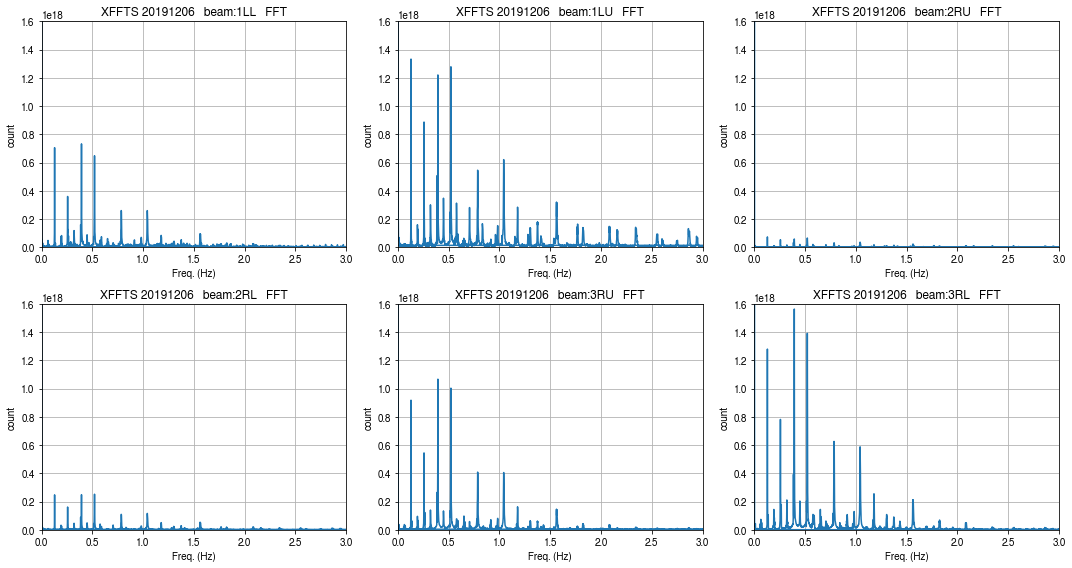

In [11]:
#FFT
figsize = (ncol * 5, nrow * 4)
fig = plt.figure(figsize=figsize)

for tpower_number,number,IF_num in zip(tpower_list,number_list,beam_list):
    freq = numpy.fft.fftfreq(len(tpower_number), d=0.1)#numpy.fft.fftfreq(n,q) n:サンプル数　q:サンプリング周期
    ax = fig.add_subplot(2,3,number)
    ax.plot(freq, abs(numpy.fft.fft(tpower_number)))#abs:配列の絶対値
    ax.set_xlabel("Freq. (Hz)")
    ax.set_ylabel("count")
    ax.set_title("XFFTS {}   beam:{}   FFT".format(time,IF_num))
    ax.grid()
    ax.set_ylim(1e14, 0.16*1e19) #<=要編集
    ax.set_xlim(0, 3)
    plt.tight_layout()#文字が重ならなくなる
    
plt.savefig("hot_monitor_FFT_{}.png".format(time)) 

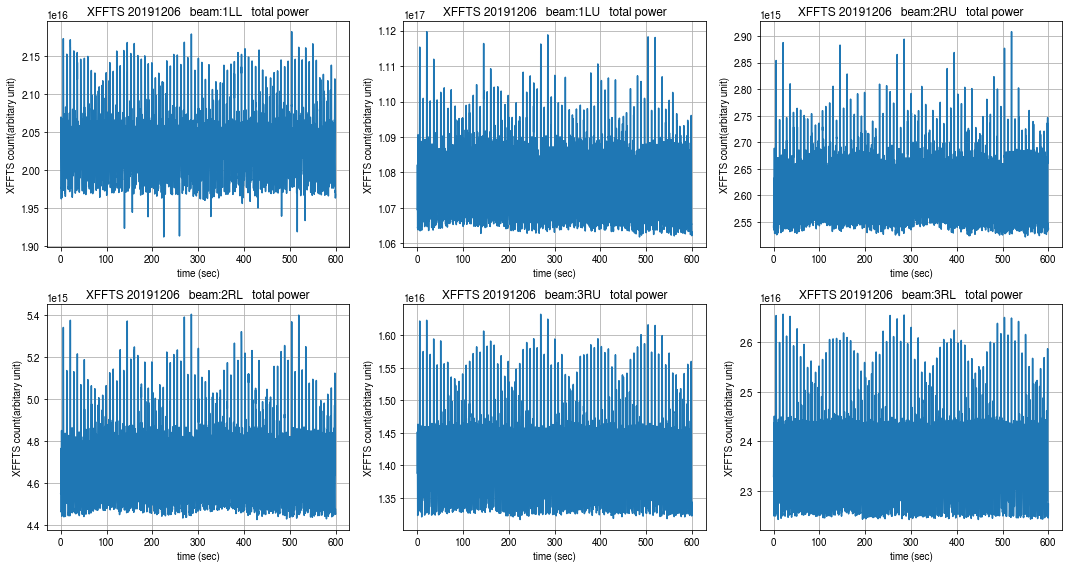

In [12]:
figsize = (ncol * 5, nrow * 4)
fig = plt.figure(figsize=figsize)

for tpower_number,timestamp,number,IF_num in zip(tpower_list,timestamp_list,number_list,beam_list):
    ax = fig.add_subplot(2,3,number)
    ax.plot(timestamp - timestamp[0],tpower_number)
    ax.set_xlabel("time (sec)")
    ax.set_ylabel("XFFTS count(arbitary unit)")
    ax.set_title("XFFTS {}   beam:{}   total power".format(time,IF_num))
    ax.grid()
    #ax.set_ylim(1e14, 0.8*1e18) #<=要編集
    #ax.set_xlim(0, 3)
    plt.tight_layout()#文字が重ならなくなる
    
plt.savefig("hot_monitor{}.png".format(time)) 

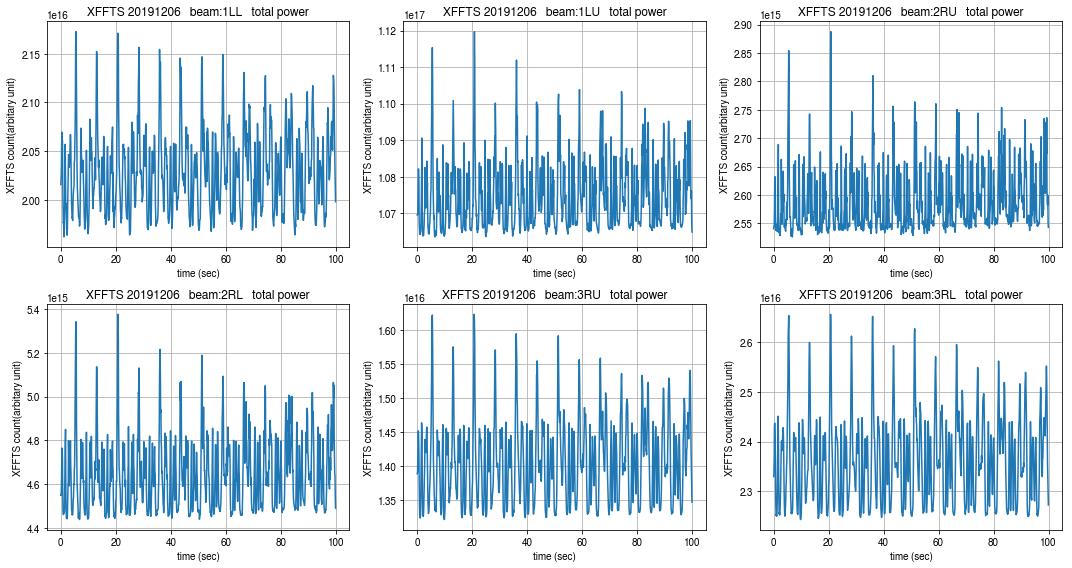

In [13]:
#最初の100秒のTpowerだけplot
figsize = (ncol * 5, nrow * 4)
fig = plt.figure(figsize=figsize)

for tpower_number,timestamp,number,IF_num in zip(tpower_list,timestamp_list,number_list,beam_list):
    timestamp = timestamp[:1000]
    tpower_number = tpower_number[:1000]
    
    ax = fig.add_subplot(2,3,number)
    ax.plot(timestamp - timestamp[0],tpower_number)
    ax.set_xlabel("time (sec)")
    ax.set_ylabel("XFFTS count(arbitary unit)")
    ax.set_title("XFFTS {}   beam:{}   total power".format(time,IF_num))
    ax.grid()
    #ax.set_ylim(1e14, 0.8*1e18) #<=要編集
    #ax.set_xlim(0, 3)
    plt.tight_layout()#文字が重ならなくなる
    
plt.savefig("hot_monitor_100s_{}.png".format(time)) 

In [137]:
#最初の100秒のTpowerだけplot  --横幅拡張
figsize = (ncol * 25/3, nrow * 4)
fig = plt.figure(figsize=figsize)

for tpower_number,timestamp,number,IF_num in zip(tpower_list,timestamp_list,number_list,beam_list):
    if number<=2:
        timestamp = timestamp[:1000]
        tpower_number = tpower_number[:1000]
        ax = fig.add_subplot(2,1,number)
        ax.plot(timestamp - timestamp[0],tpower_number)
        ax.set_xlabel("time (sec)")
        ax.set_ylabel("XFFTS count(arbitary unit)")
        ax.set_title("XFFTS {}   beam:{}   total power".format(time,IF_num))
        ax.grid()
        #ax.set_ylim(1e14, 0.8*1e18) #<=要編集
        #ax.set_xlim(0, 3)
        plt.tight_layout()#文字が重ならなくなる
plt.savefig("hot_monitor_100s_1_{}.png".format(time)) 

NameError: name 'ncol' is not defined

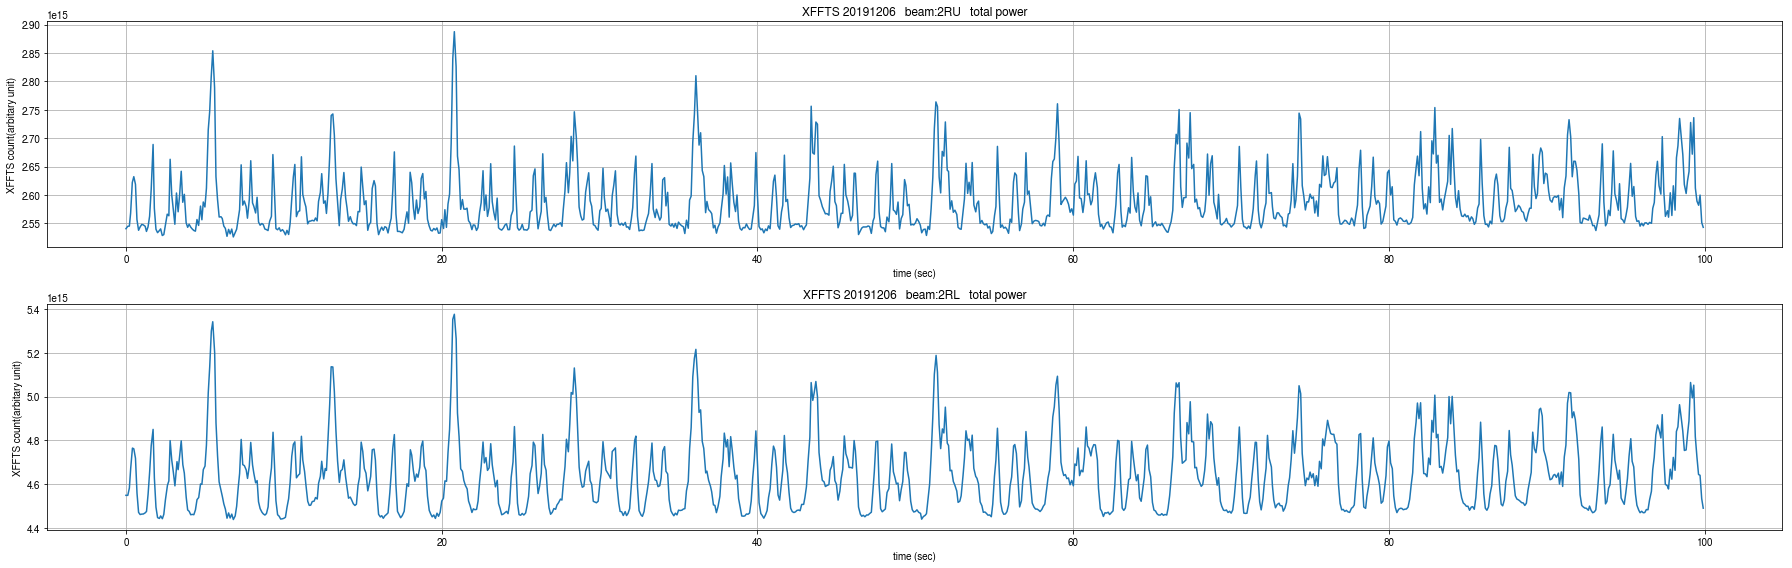

In [20]:
figsize = (ncol * 25/3, nrow * 4)
fig = plt.figure(figsize=figsize)

for tpower_number,timestamp,number,IF_num in zip(tpower_list,timestamp_list,number_list,beam_list):
    if 3<=number<=4:
        number = number -2
        timestamp = timestamp[:1000]
        tpower_number = tpower_number[:1000]
        ax = fig.add_subplot(2,1,number)
        ax.plot(timestamp - timestamp[0],tpower_number)
        ax.set_xlabel("time (sec)")
        ax.set_ylabel("XFFTS count(arbitary unit)")
        ax.set_title("XFFTS {}   beam:{}   total power".format(time,IF_num))
        ax.grid()
        #ax.set_ylim(1e14, 0.8*1e18) #<=要編集
        #ax.set_xlim(0, 3)
        plt.tight_layout()#文字が重ならなくなる
plt.savefig("hot_monitor_100s_2_{}.png".format(time)) 

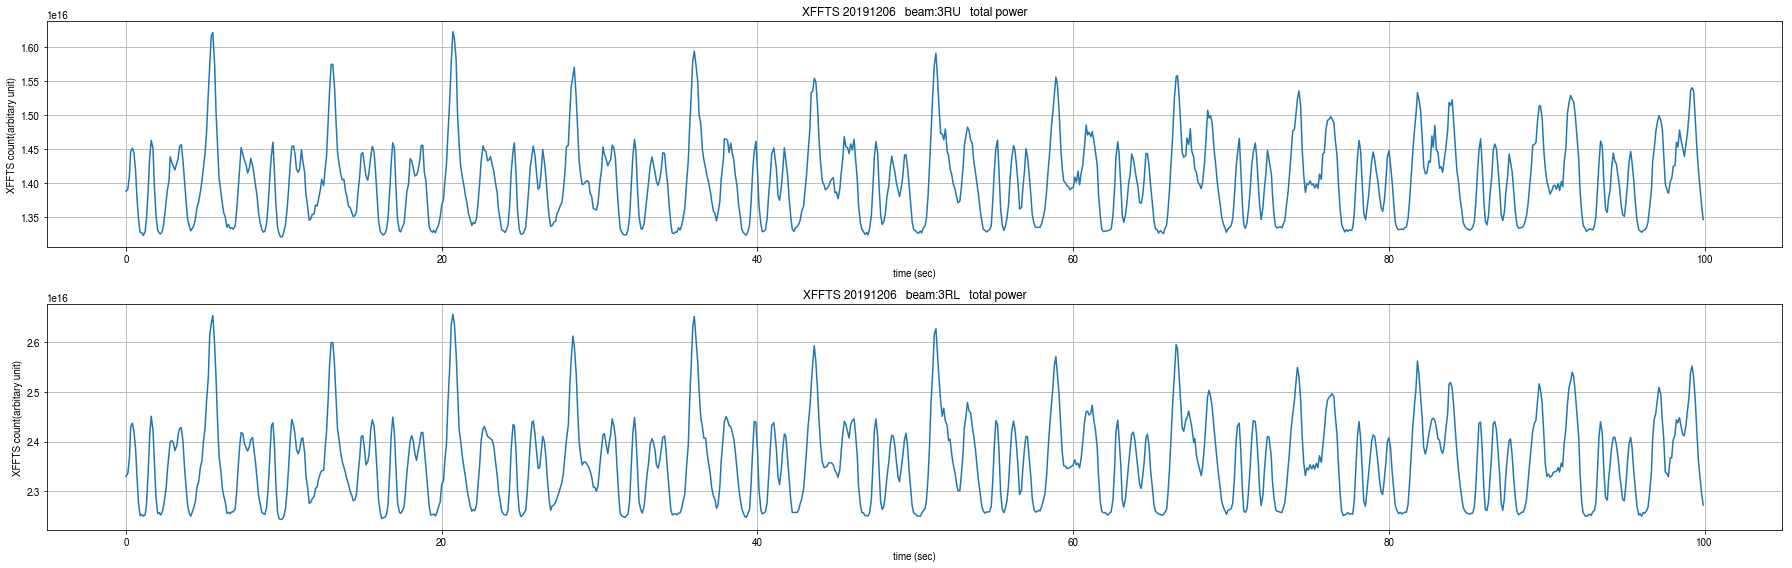

In [21]:
figsize = (ncol * 25/3, nrow * 4)
fig = plt.figure(figsize=figsize)

for tpower_number,timestamp,number,IF_num in zip(tpower_list,timestamp_list,number_list,beam_list):
    if 5<=number<=6:
        number = number-4
        timestamp = timestamp[:1000]
        tpower_number = tpower_number[:1000]
        ax = fig.add_subplot(2,1,number)
        ax.plot(timestamp - timestamp[0],tpower_number)
        ax.set_xlabel("time (sec)")
        ax.set_ylabel("XFFTS count(arbitary unit)")
        ax.set_title("XFFTS {}   beam:{}   total power".format(time,IF_num))
        ax.grid()
        #ax.set_ylim(1e14, 0.8*1e18) #<=要編集
        #ax.set_xlim(0, 3)
        plt.tight_layout()#文字が重ならなくなる
plt.savefig("hot_monitor_100s_3_{}.png".format(time)) 

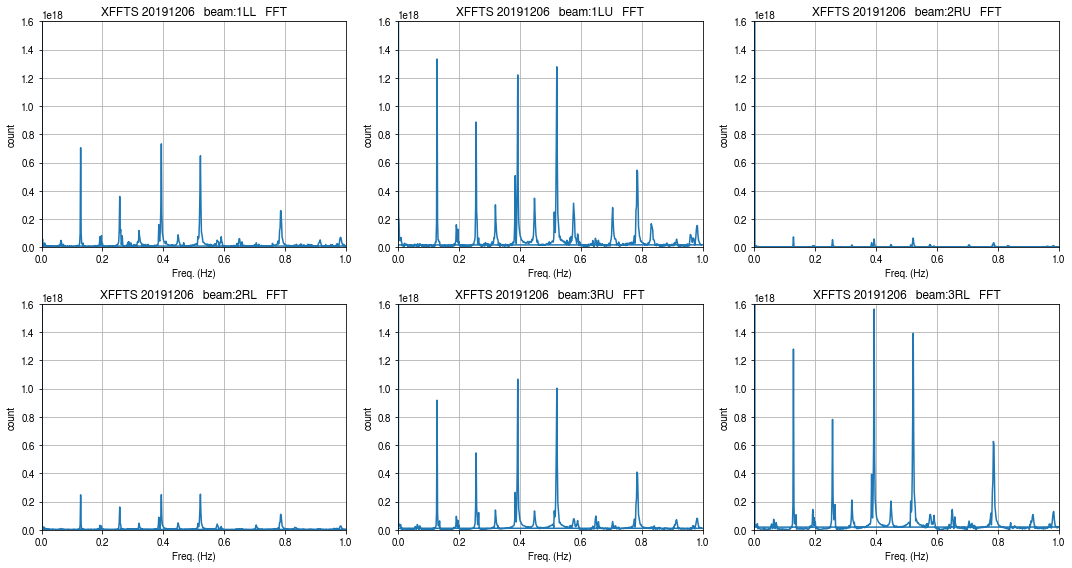

In [17]:
#FFT --横軸0-1Hz
figsize = (ncol * 5, nrow * 4)
fig = plt.figure(figsize=figsize)

for tpower_number,number,IF_num in zip(tpower_list,number_list,beam_list):
    freq = numpy.fft.fftfreq(len(tpower_number), d=0.1)#numpy.fft.fftfreq(n,q) n:サンプル数　q:サンプリング周期
    freq = freq[freq<=1]
    ax = fig.add_subplot(2,3,number)
    freq = freq
    ax.plot(freq, abs(numpy.fft.fft(tpower_number))[:len(freq)])#abs:配列の絶対値
    ax.set_xlabel("Freq. (Hz)")
    ax.set_ylabel("count")
    ax.set_title("XFFTS {}   beam:{}   FFT".format(time,IF_num))
    ax.grid()
    ax.set_ylim(1e14, 0.16*1e19) #<=要編集
    ax.set_xlim(0, 1)
    plt.tight_layout()#文字が重ならなくなる
    
plt.savefig("hot_monitor_FFT_0to1_{}.png".format(time)) 

In [18]:
#tpowerの積分時間を変更(100to490mHz)
